In [268]:
# =============================================================================
# 1. CONFIGURACIÓNN E IMPORTACIÓN DE LIBRERÍAS
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo para gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("🔬 ANÁLISIS EXPLORATORIO DE DATOS - DATASET DE HONGOS")
print("=" * 60)

🔬 ANÁLISIS EXPLORATORIO DE DATOS - DATASET DE HONGOS


In [269]:
# =============================================================================
# 2. CARGA Y EXPLORACIÓN INICIAL DEL DATASET
# =============================================================================

from ucimlrepo import fetch_ucirepo

# Fetch dataset
mushroom = fetch_ucirepo(id=73)

# Datos como DataFrames de pandas
X = mushroom.data.features
y = mushroom.data.targets

# Combinar características y objetivo
df = pd.concat([X, y], axis=1)

print(" INFORMACIÓN GENERAL DEL DATASET")
print("=" * 50)
print(f"• Número de registros: {df.shape[0]:,}")
print(f"• Número de variables: {df.shape[1]}")
print(f"• Variables predictoras: {X.shape[1]}")
print(f"• Variable objetivo: 'poisonous'")

print("\n METADATOS DEL DATASET:")
print(f"• Nombre: {mushroom.metadata['name']}")
print(f"• Descripción: {mushroom.metadata['abstract'][:100]}...")
print(f"• Área: {mushroom.metadata['area']}")
print(f"• Tarea: {mushroom.metadata['tasks'][0]}")

print("\n🔍 PRIMERAS FILAS DEL DATASET:")
print(df.head())

print("\n INFORMACIÓN DE VARIABLES:")
for i, var in enumerate(mushroom.variables.name):
    print(f"{i+1:2d}. {var:25} | Rol: {mushroom.variables.role[i]:8} | Tipo: {mushroom.variables.type[i]:12}")

📊 INFORMACIÓN GENERAL DEL DATASET
• Número de registros: 8,124
• Número de variables: 23
• Variables predictoras: 22
• Variable objetivo: 'poisonous'

📋 METADATOS DEL DATASET:
• Nombre: Mushroom
• Descripción: From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classifi...
• Área: Biology
• Tarea: Classification

🔍 PRIMERAS FILAS DEL DATASET:
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape stalk-root stalk-surface-above-ring  \
0         n          k           e          e                     

In [272]:
# =============================================================================
# 3. ANÁLISIS DE CALIDAD DE DATOS
# =============================================================================

print(" ANÁLISIS DE CALIDAD DE DATOS")
print("=" * 50)

# Información básica del dataset
print("\n INFORMACIÓN ESTRUCTURAL:")
print(df.info())

# Verificación de valores nulos
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({
    'Valores_Faltantes': missing_data,
    'Porcentaje': missing_percent
}).sort_values('Valores_Faltantes', ascending=False)

missing_info = missing_info[missing_info['Valores_Faltantes'] > 0]



# Verificación de duplicados
duplicates = df.duplicated().sum()
duplicate_percent = (duplicates / len(df)) * 100
print(f"\n REGISTROS DUPLICADOS: {duplicates} ({duplicate_percent:.2f}%)")

# Análisis de cardinalidad por variable
print("\n ANÁLISIS DE CARDINALIDAD:")
cardinality = {}
for col in df.columns:
    unique_vals = df[col].nunique()
    cardinality[col] = {
        'Valores_Únicos': unique_vals,
        'Tipo': df[col].dtype,
        'Ejemplos': df[col].value_counts().head(3).to_dict()
    }

cardinality_df = pd.DataFrame(cardinality).T
print(cardinality_df.sort_values('Valores_Únicos', ascending=False).head(10))

 ANÁLISIS DE CALIDAD DE DATOS

 INFORMACIÓN ESTRUCTURAL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-rin

 ANÁLISIS DE LA VARIABLE OBJETIVO: 'poisonous'

📊 DISTRIBUCIÓN DE CLASES:
• 🍄 Comestible (Edible): 4,208 muestras (51.80%)
• ☠️ Venenoso (Poisonous): 3,916 muestras (48.20%)


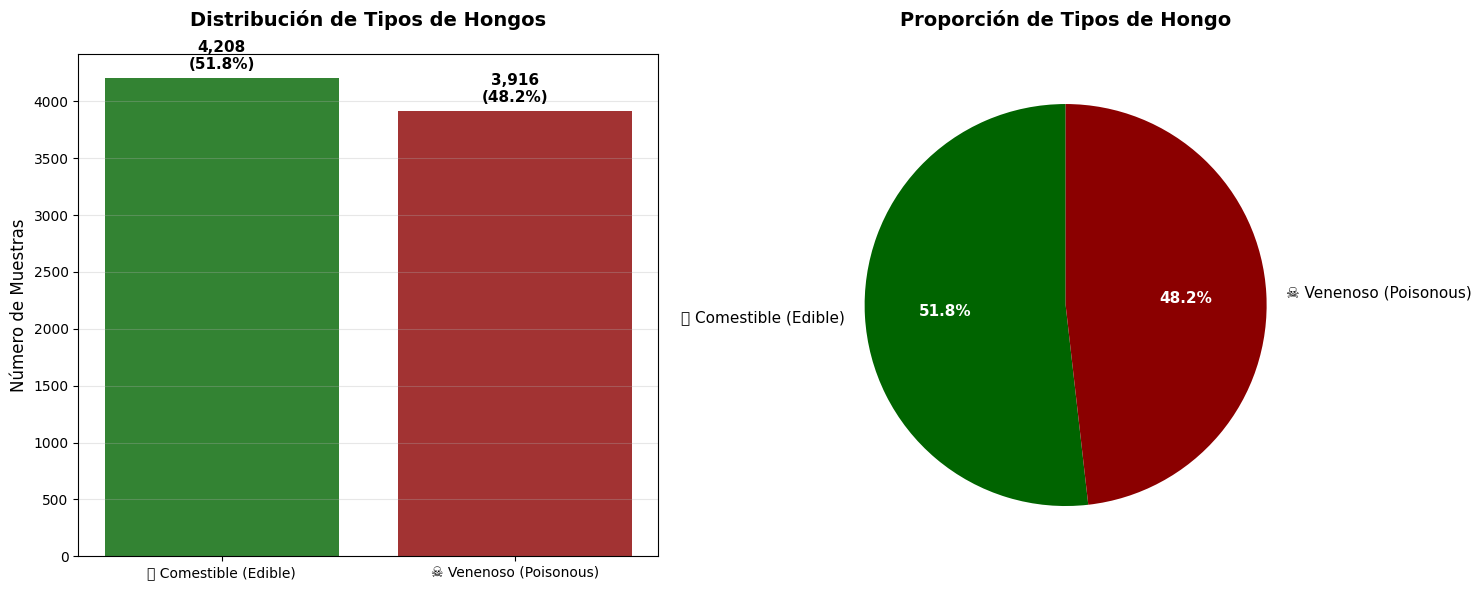


  RATIO DE BALANCE: 1.07:1
 El dataset está razonablemente balanceado


In [274]:
# =============================================================================
# 4. ANÁLISIS DE LA VARIABLE OBJETIVO
# =============================================================================

print(" ANÁLISIS DE LA VARIABLE OBJETIVO: 'poisonous'")
print("=" * 50)

# Distribución de la variable objetivo
target_distribution = df['poisonous'].value_counts()
target_percentage = (target_distribution / len(df)) * 100

# Diccionario de descripciones
class_descriptions = {
    'e': '🍄 Comestible (Edible)',
    'p': '☠️ Venenoso (Poisonous)'
}

print("\n📊 DISTRIBUCIÓN DE CLASES:")
for class_code, count in target_distribution.items():
    desc = class_descriptions.get(class_code, 'Desconocido')
    print(f"• {desc}: {count:,} muestras ({target_percentage[class_code]:.2f}%)")

# Visualización de la distribución
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
colors = ['darkgreen', 'darkred']  # Verde para comestible, rojo para venenoso
bars = ax1.bar([class_descriptions[c] for c in target_distribution.index], 
               target_distribution.values, 
               color=colors, alpha=0.8)
ax1.set_title('Distribución de Tipos de Hongos', fontweight='bold', fontsize=14, pad=20)
ax1.set_ylabel('Número de Muestras', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar, count, percentage in zip(bars, target_distribution.values, target_percentage.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
            f'{count:,}\n({percentage:.1f}%)', 
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# Gráfico de pie
wedges, texts, autotexts = ax2.pie(target_distribution.values, 
                                  labels=[class_descriptions[c] for c in target_distribution.index],
                                  autopct='%1.1f%%',
                                  colors=colors,
                                  startangle=90,
                                  textprops={'fontsize': 11})
ax2.set_title('Proporción de Tipos de Hongo', fontweight='bold', fontsize=14, pad=20)

# Mejorar el gráfico de pie
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Estadísticas de balance
balance_ratio = target_distribution.max() / target_distribution.min()
print(f"\n  RATIO DE BALANCE: {balance_ratio:.2f}:1")
if balance_ratio > 2:
    print("  El dataset presenta desbalance moderado")
else:
    print(" El dataset está razonablemente balanceado")

ANÁLISIS UNIVARIANTE - VARIABLES CATEGÓRICAS
📋 DISTRIBUCIÓN DE VARIABLES POR CARDINALIDAD:
• Baja cardinalidad (≤5 categorías): 13 variables
• Media cardinalidad (6-10 categorías): 8 variables
• Alta cardinalidad (>10 categorías): 1 variables

🔍 ANALIZANDO 13 VARIABLES CON BAJA CARDINALIDAD...


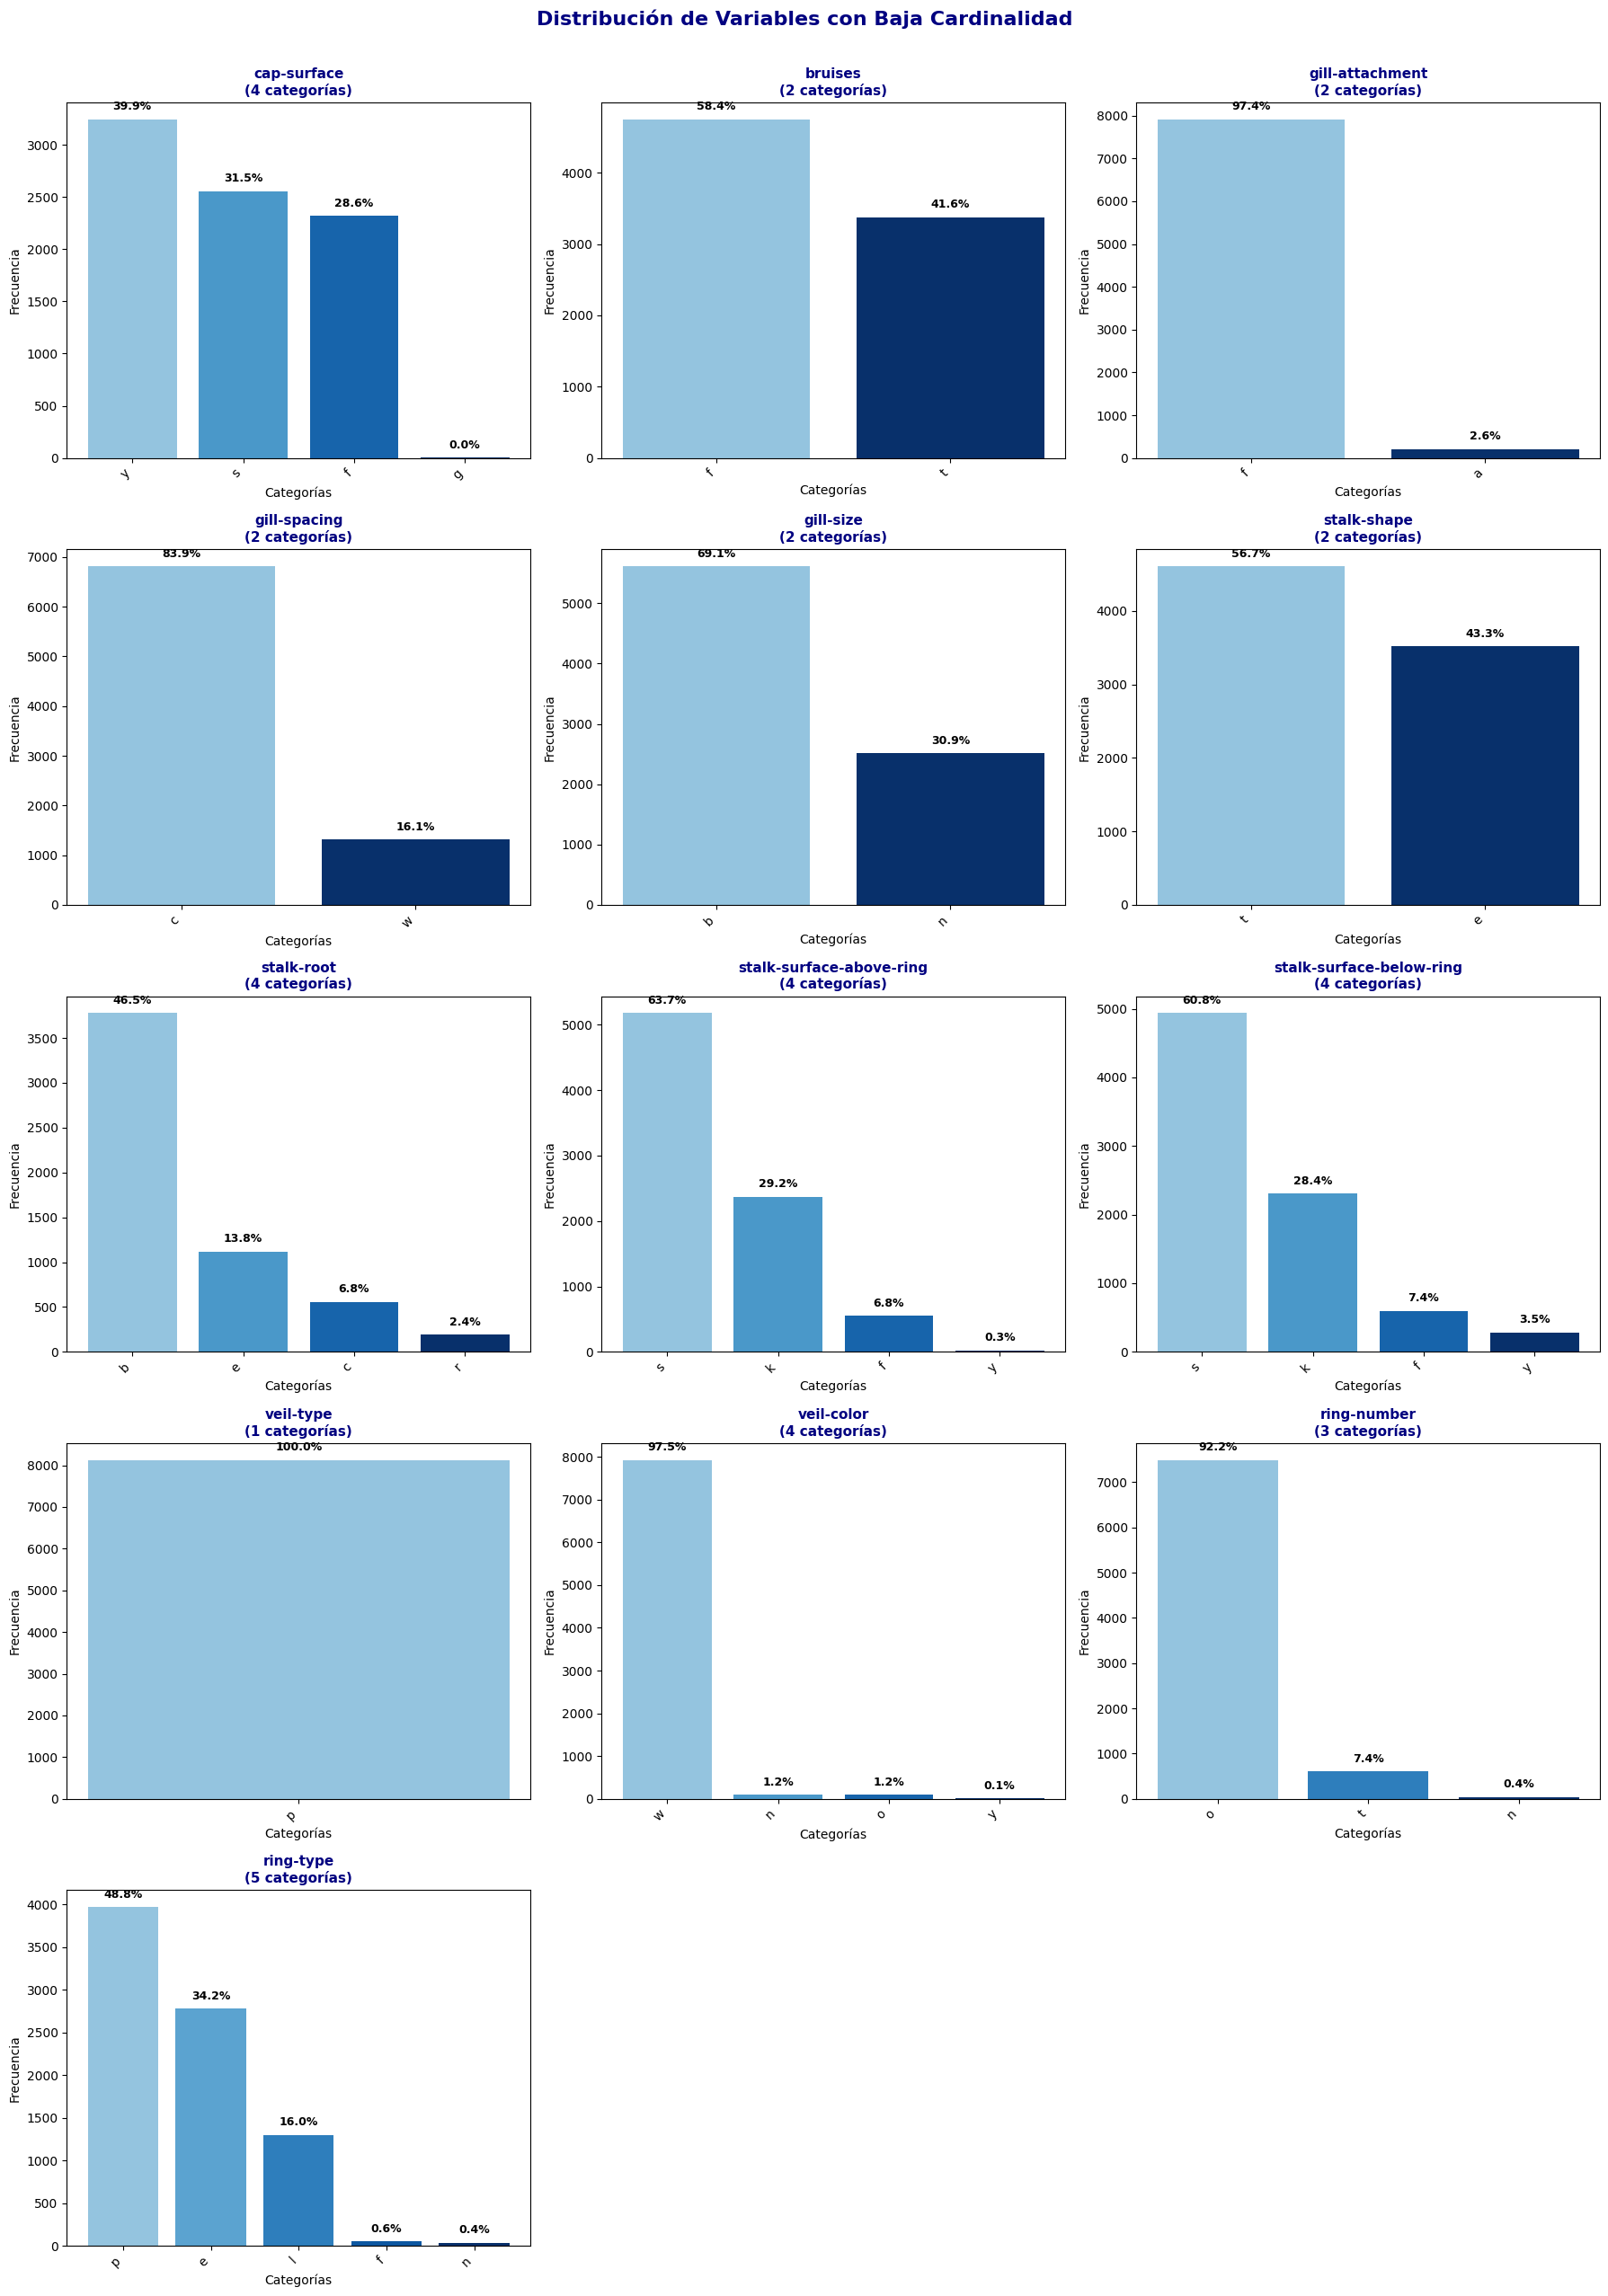


RESUMEN ESTADÍSTICO DE DISTRIBUCIONES:

cap-surface:
  • y: 3,244 (39.9%)
  • s: 2,556 (31.5%)
  • f: 2,320 (28.6%)
  • g: 4 (0.0%)

bruises:
  • f: 4,748 (58.4%)
  • t: 3,376 (41.6%)

gill-attachment:
  • f: 7,914 (97.4%)
  • a: 210 (2.6%)

gill-spacing:
  • c: 6,812 (83.9%)
  • w: 1,312 (16.1%)

gill-size:
  • b: 5,612 (69.1%)
  • n: 2,512 (30.9%)


In [279]:
# ============================================================================= 
# 5. ANÁLISIS UNIVARIANTE DE VARIABLES CATEGÓRICAS
# =============================================================================

print("ANÁLISIS UNIVARIANTE - VARIABLES CATEGÓRICAS")
print("=" * 50)

# Excluir la variable objetivo para el análisis
features = [col for col in df.columns if col != 'poisonous']

# Agrupar variables por número de categorías
low_cardinality = [col for col in features if df[col].nunique() <= 5]
medium_cardinality = [col for col in features if 5 < df[col].nunique() <= 10]
high_cardinality = [col for col in features if df[col].nunique() > 10]

print(f"📋 DISTRIBUCIÓN DE VARIABLES POR CARDINALIDAD:")
print(f"• Baja cardinalidad (≤5 categorías): {len(low_cardinality)} variables")
print(f"• Media cardinalidad (6-10 categorías): {len(medium_cardinality)} variables")
print(f"• Alta cardinalidad (>10 categorías): {len(high_cardinality)} variables")

# Análisis de variables con baja cardinalidad
print(f"\n🔍 ANALIZANDO {len(low_cardinality)} VARIABLES CON BAJA CARDINALIDAD...")

# Crear subplots para variables con baja cardinalidad
n_cols = 3
n_rows = (len(low_cardinality) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(low_cardinality):
    if i < len(axes):
        # Calcular frecuencias
        value_counts = df[col].value_counts()
        percentages = (value_counts / len(df)) * 100
        
        # Crear gráfico de barras en azul
        # Crear gráfico de barras con distintos tonos de azul
        colors = plt.cm.Blues(np.linspace(0.4, 1, len(value_counts)))  # tonos de azul
        bars = axes[i].bar(range(len(value_counts)), value_counts.values, color=colors)

        
        # Títulos y etiquetas
        axes[i].set_title(f'{col}\n({df[col].nunique()} categorías)', fontweight='bold', fontsize=11, color='navy')
        axes[i].set_xlabel('Categorías', fontsize=10)
        axes[i].set_ylabel('Frecuencia', fontsize=10)
        
        # Personalizar ejes
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
        
        # Añadir etiquetas de porcentaje
        for bar, count, pct in zip(bars, value_counts.values, percentages.values):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + (max(value_counts.values)*0.02),
                         f'{pct:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Ocultar ejes vacíos
for i in range(len(low_cardinality), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.suptitle('Distribución de Variables con Baja Cardinalidad', fontweight='bold', fontsize=16, y=1.02, color='navy')
plt.show()

# Resumen estadístico de distribuciones
print("\nRESUMEN ESTADÍSTICO DE DISTRIBUCIONES:")
for col in low_cardinality[:5]:  # Mostrar solo las primeras 5 para no saturar
    value_counts = df[col].value_counts()
    print(f"\n{col}:")
    for val, count in value_counts.items():
        pct = (count / len(df)) * 100
        print(f"  • {val}: {count:,} ({pct:.1f}%)")


🔗 ANÁLISIS BIVARIANTE - RELACIÓN CON VARIABLE OBJETIVO
📊 ANALIZANDO RELACIONES CON VARIABLES CLAVE...


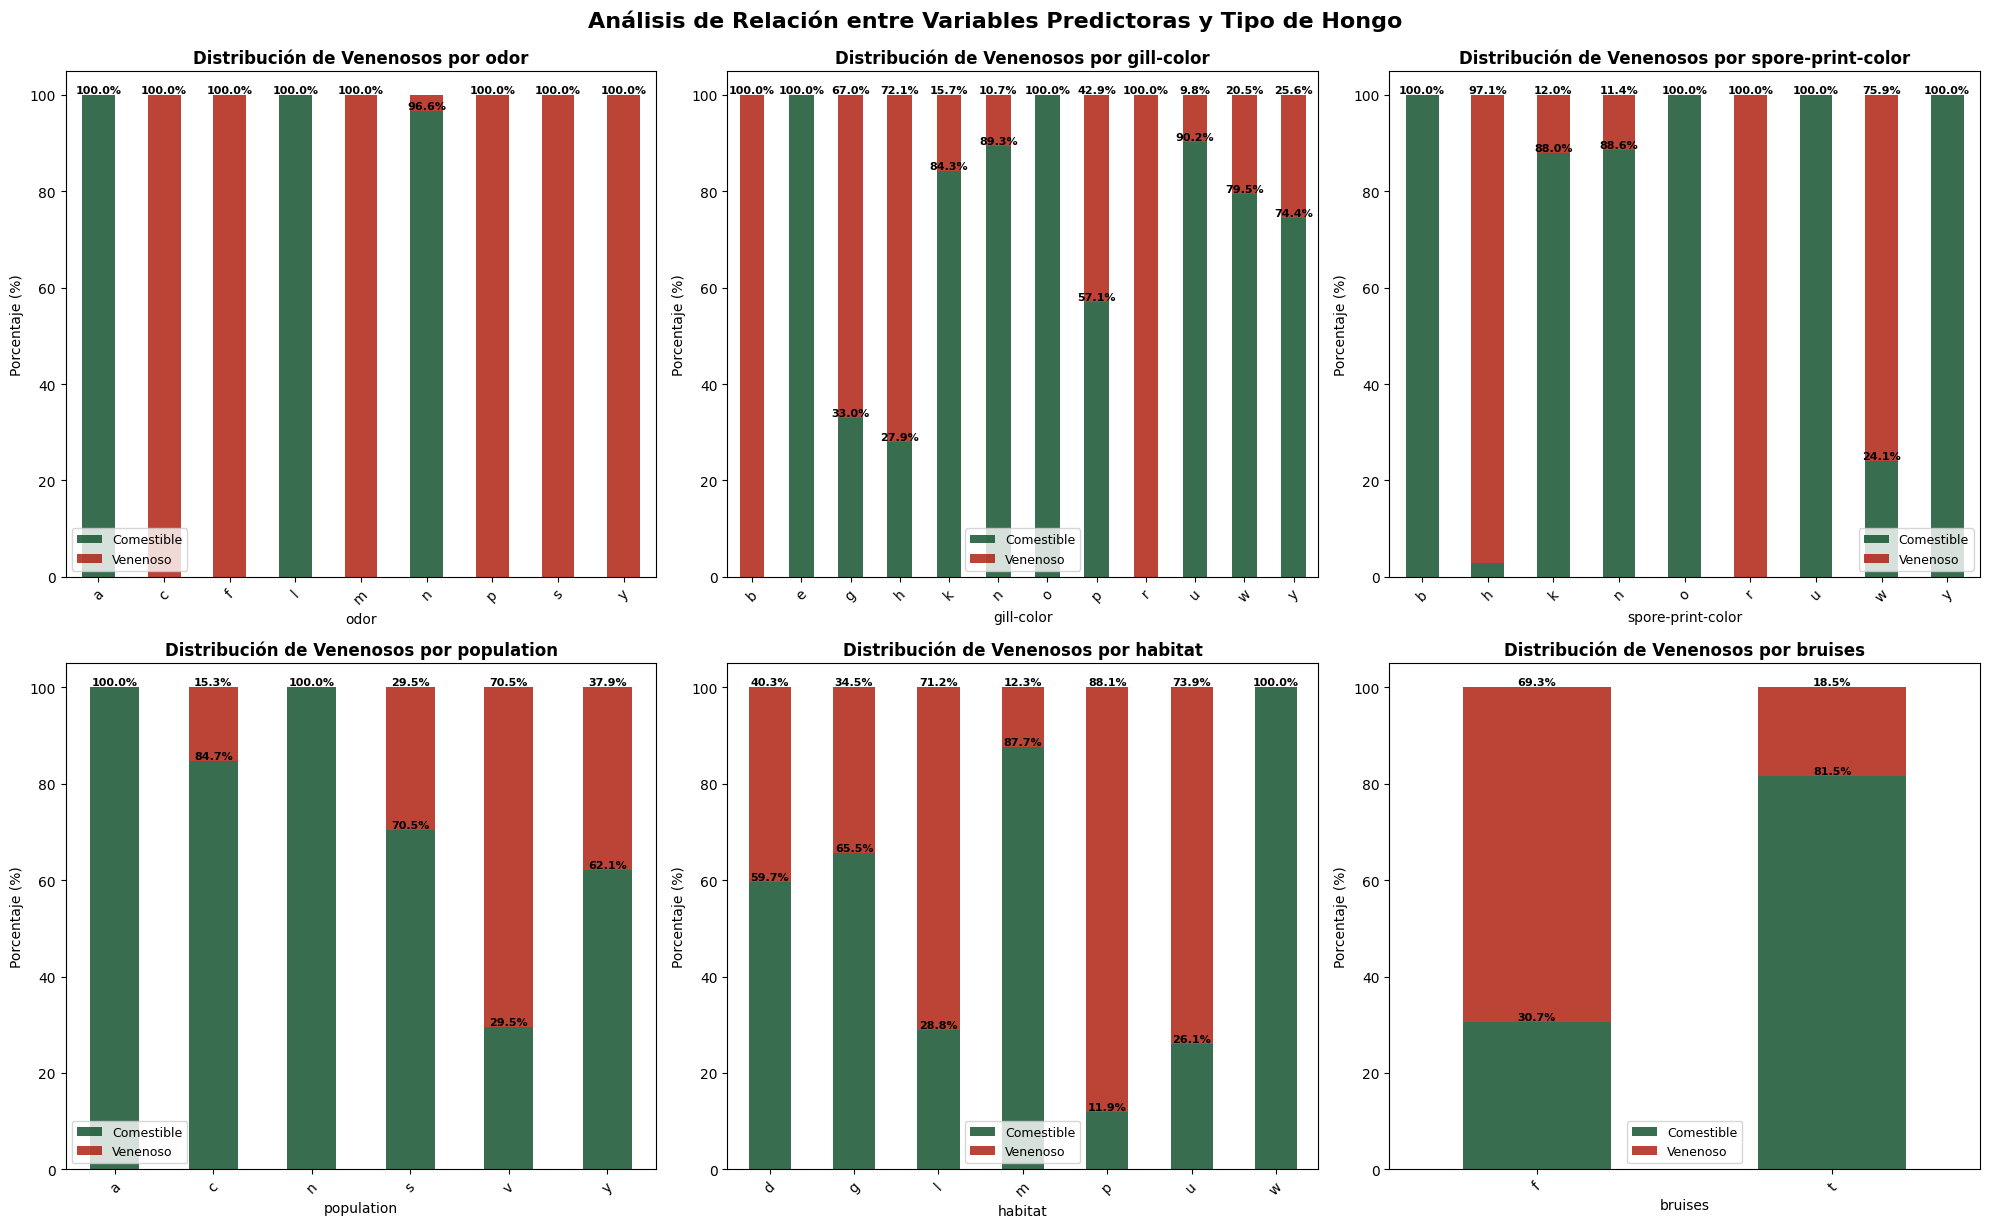


👃 ANÁLISIS DETALLADO DE LA VARIABLE 'odor':

Tabla de contingencia absoluta:
poisonous     e     p   All
odor                       
a           400     0   400
c             0   192   192
f             0  2160  2160
l           400     0   400
m             0    36    36
n          3408   120  3528
p             0   256   256
s             0   576   576
y             0   576   576
All        4208  3916  8124

Tabla de contingencia porcentual:
poisonous      e      p
odor                   
a          100.0    0.0
c            0.0  100.0
f            0.0  100.0
l          100.0    0.0
m            0.0  100.0
n           96.6    3.4
p            0.0  100.0
s            0.0  100.0
y            0.0  100.0

📋 INTERPRETACIÓN DE OLORES:
• none       (n): 3528 muestras | Comestible:  96.6% | ✅ SEGURO
• foul       (f): 2160 muestras | Comestible:   0.0% | ☠️ PELIGROSO
• spicy      (s):  576 muestras | Comestible:   0.0% | ☠️ PELIGROSO
• fishy      (y):  576 muestras | Comestible:   0.0% | ☠️ 

In [282]:
# =============================================================================
# 6. ANÁLISIS BIVARIANTE CON LA VARIABLE OBJETIVO
# =============================================================================

print("🔗 ANÁLISIS BIVARIANTE - RELACIÓN CON VARIABLE OBJETIVO")
print("=" * 60)

# Seleccionar variables más interesantes para análisis bivariante
key_variables = ['odor', 'gill-color', 'spore-print-color', 'population', 'habitat', 'bruises']

print("📊 ANALIZANDO RELACIONES CON VARIABLES CLAVE...")

# Crear subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(key_variables):
    if i < len(axes):
        # Crear tabla de contingencia
        contingency_table = pd.crosstab(df[col], df['poisonous'], normalize='index') * 100
        
        # Crear gráfico de barras apiladas
        bars = contingency_table.plot(kind='bar', ax=axes[i], 
                                     color=["#064A23", "#AB1504"], 
                                     alpha=0.8, 
                                     stacked=True)
        
        axes[i].set_title(f'Distribución de Venenosos por {col}', fontweight='bold', fontsize=12)
        axes[i].set_xlabel(col, fontsize=10)
        axes[i].set_ylabel('Porcentaje (%)', fontsize=10)
        axes[i].legend(['Comestible', 'Venenoso'], fontsize=9)
        axes[i].tick_params(axis='x', rotation=45)
        
        # Añadir anotaciones de porcentaje
        for container in axes[i].containers:
            axes[i].bar_label(container, labels=[f'{v:.1f}%' if v > 5 else '' for v in container.datavalues], 
                            fontsize=8, fontweight='bold')

plt.tight_layout()
plt.suptitle('Análisis de Relación entre Variables Predictoras y Tipo de Hongo', 
             fontweight='bold', fontsize=16, y=1.02)
plt.show()

# Análisis detallado de la variable 'odor' (probablemente la más predictiva)
print("\n👃 ANÁLISIS DETALLADO DE LA VARIABLE 'odor':")
odor_analysis = pd.crosstab(df['odor'], df['poisonous'], margins=True)
odor_percentage = pd.crosstab(df['odor'], df['poisonous'], normalize='index') * 100

print("\nTabla de contingencia absoluta:")
print(odor_analysis)

print("\nTabla de contingencia porcentual:")
print(odor_percentage.round(1))

# Diccionario de descripción de olores
odor_descriptions = {
    'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy',
    'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'
}

print("\n📋 INTERPRETACIÓN DE OLORES:")
for odor_code, count in df['odor'].value_counts().items():
    desc = odor_descriptions.get(odor_code, 'desconocido')
    edible_pct = odor_percentage.loc[odor_code, 'e'] if odor_code in odor_percentage.index else 0
    poisonous_pct = odor_percentage.loc[odor_code, 'p'] if odor_code in odor_percentage.index else 0
    safety = "✅ SEGURO" if edible_pct > 90 else "⚠️ MIXTO" if edible_pct > 10 else "☠️ PELIGROSO"
    print(f"• {desc:10} ({odor_code}): {count:4} muestras | Comestible: {edible_pct:5.1f}% | {safety}")

In [283]:
# =============================================================================
# 7. ANÁLISIS DE VALORES FALTANTES DETALLADO
# =============================================================================

print("🔍 ANÁLISIS DETALLADO DE VALORES FALTANTES")
print("=" * 50)

# Identificar columnas con valores faltantes
missing_columns = missing_info[missing_info['Valores_Faltantes'] > 0].index.tolist()

if missing_columns:
    print(f"📋 VARIABLES CON VALORES FALTANTES: {len(missing_columns)}")
    
    for col in missing_columns:
        missing_count = df[col].isnull().sum()
        missing_pct = (missing_count / len(df)) * 100
        print(f"• {col}: {missing_count:,} valores faltantes ({missing_pct:.2f}%)")
        
        # Analizar distribución de la variable con valores faltantes
        if df[col].nunique() < 10:  # Solo para variables con baja cardinalidad
            value_dist = df[col].value_counts(dropna=False)
            print(f"  Distribución: {dict(value_dist)}")
    
    # Análisis de patrones de valores faltantes
    print("\n🔎 PATRONES DE VALORES FALTANTES:")
    
    # Crear máscara de valores faltantes
    missing_mask = df[missing_columns].isnull()
    
    # Verificar si hay patrones sistemáticos
    missing_patterns = missing_mask.astype(int).sum(axis=1)
    pattern_counts = missing_patterns.value_counts().sort_index()
    
    print("\nPatrones de valores faltantes por registro:")
    for pattern, count in pattern_counts.items():
        if pattern > 0:
            print(f"• {count:4} registros tienen {pattern} valor(es) faltante(s)")
    
    # Análisis de la relación entre valores faltantes y la variable objetivo
    print("\n📊 RELACIÓN ENTRE VALORES FALTANTES Y VARIABLE OBJETIVO:")
    for col in missing_columns:
        temp_df = df.copy()
        temp_df[f'{col}_missing'] = temp_df[col].isnull()
        
        if temp_df[f'{col}_missing'].nunique() > 1:
            relationship = pd.crosstab(temp_df[f'{col}_missing'], temp_df['poisonous'], normalize='index') * 100
            print(f"\n{col}:")
            print(relationship.round(1))
            
            # Verificar si hay diferencia significativa
            missing_poisonous_pct = relationship.loc[True, 'p'] if True in relationship.index else 0
            not_missing_poisonous_pct = relationship.loc[False, 'p'] if False in relationship.index else 0
            
            diff = abs(missing_poisonous_pct - not_missing_poisonous_pct)
            if diff > 10:
                print(f"  ⚠️  Diferencia significativa: {diff:.1f}%")
else:
    print("✅ No hay valores faltantes en el dataset")

🔍 ANÁLISIS DETALLADO DE VALORES FALTANTES
📋 VARIABLES CON VALORES FALTANTES: 1
• stalk-root: 2,480 valores faltantes (30.53%)
  Distribución: {'b': np.int64(3776), nan: np.int64(2480), 'e': np.int64(1120), 'c': np.int64(556), 'r': np.int64(192)}

🔎 PATRONES DE VALORES FALTANTES:

Patrones de valores faltantes por registro:
• 2480 registros tienen 1 valor(es) faltante(s)

📊 RELACIÓN ENTRE VALORES FALTANTES Y VARIABLE OBJETIVO:

stalk-root:
poisonous              e     p
stalk-root_missing            
False               61.8  38.2
True                29.0  71.0
  ⚠️  Diferencia significativa: 32.8%


📈 ANÁLISIS DE ASOCIACIONES ENTRE VARIABLES CATEGÓRICAS
🔍 CALCULANDO ASOCIACIONES ENTRE VARIABLES...


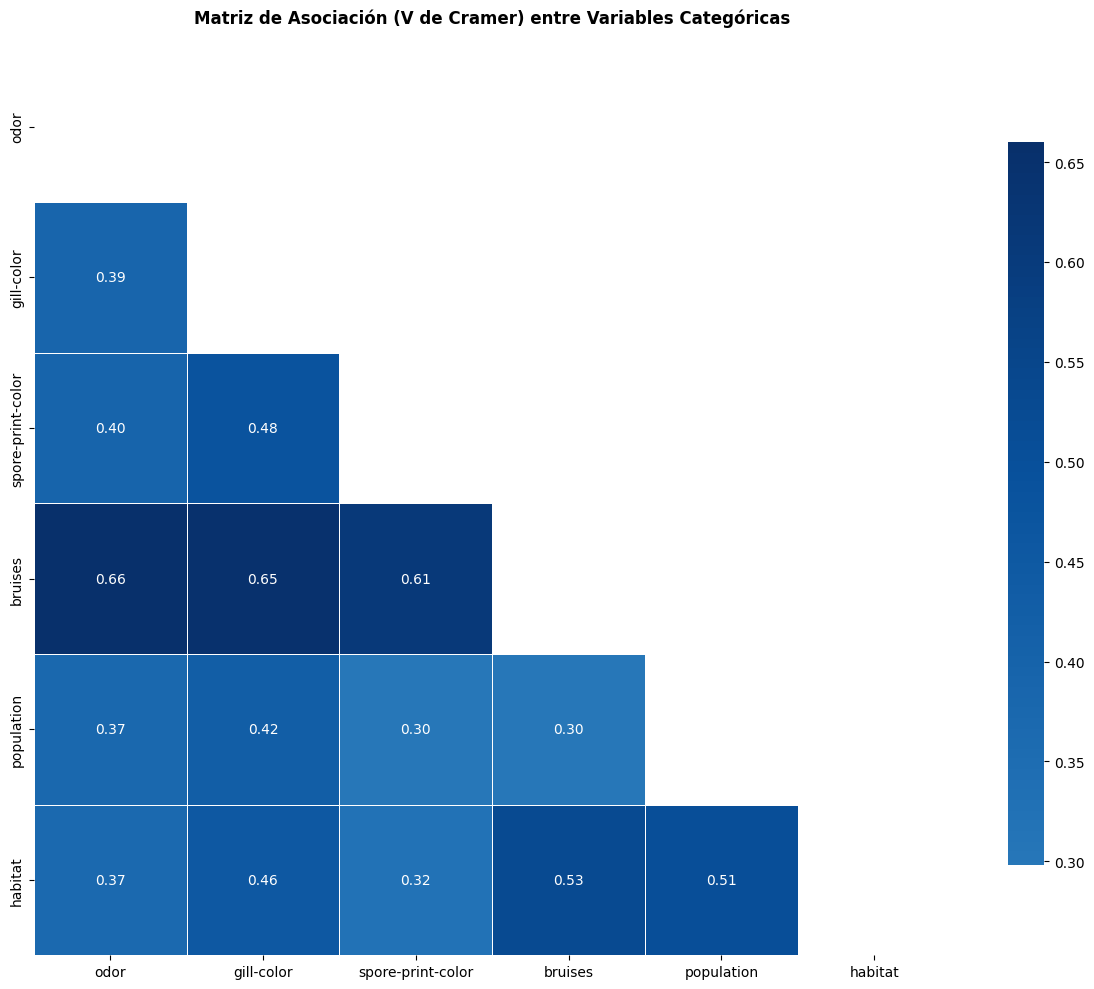


🔗 ASOCIACIONES FUERTES ENTRE VARIABLES (V > 0.5):
• odor ↔ bruises: V = 0.660
• gill-color ↔ bruises: V = 0.649
• spore-print-color ↔ bruises: V = 0.612
• bruises ↔ habitat: V = 0.530
• population ↔ habitat: V = 0.506


In [285]:
# =============================================================================
# 8. ANÁLISIS DE CORRELACIONES ENTRE VARIABLES CATEGÓRICAS
# =============================================================================

print("📈 ANÁLISIS DE ASOCIACIONES ENTRE VARIABLES CATEGÓRICAS")
print("=" * 60)

from scipy.stats import chi2_contingency

# Seleccionar variables para análisis de correlación
analysis_vars = ['odor', 'gill-color', 'spore-print-color', 'bruises', 'population', 'habitat']

print("🔍 CALCULANDO ASOCIACIONES ENTRE VARIABLES...")

# Matriz de correlación usando V de Cramer
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calcular matriz de asociación
assoc_matrix = pd.DataFrame(np.ones((len(analysis_vars), len(analysis_vars))), 
                           index=analysis_vars, columns=analysis_vars)

for i, var1 in enumerate(analysis_vars):
    for j, var2 in enumerate(analysis_vars):
        if i < j:
            v = cramers_v(df[var1], df[var2])
            assoc_matrix.loc[var1, var2] = v
            assoc_matrix.loc[var2, var1] = v

# Visualizar matriz de asociación
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(assoc_matrix, dtype=bool))
sns.heatmap(assoc_matrix, mask=mask, annot=True, cmap='Blues', 
            center=0, fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Matriz de Asociación (V de Cramer) entre Variables Categóricas', 
          fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identificar asociaciones fuertes
print("\n🔗 ASOCIACIONES FUERTES ENTRE VARIABLES (V > 0.5):")
strong_associations = []
for i, var1 in enumerate(analysis_vars):
    for j, var2 in enumerate(analysis_vars):
        if i < j and assoc_matrix.loc[var1, var2] > 0.5:
            strong_associations.append((var1, var2, assoc_matrix.loc[var1, var2]))

if strong_associations:
    for var1, var2, strength in strong_associations:
        print(f"• {var1} ↔ {var2}: V = {strength:.3f}")
else:
    print("No se encontraron asociaciones muy fuertes entre estas variables")

🎯 IDENTIFICACIÓN DE VARIABLES MÁS PREDICTIVAS
📊 IMPORTANCIA DE VARIABLES (Información Mutua):
 1. odor                 : 0.6295
 2. spore-print-color    : 0.3302
 3. gill-color           : 0.2839
 4. ring-type            : 0.2181
 5. stalk-surface-above-ring : 0.2037
 6. stalk-surface-below-ring : 0.1873
 7. stalk-color-above-ring : 0.1802
 8. stalk-color-below-ring : 0.1661
 9. gill-size            : 0.1559
10. population           : 0.1448


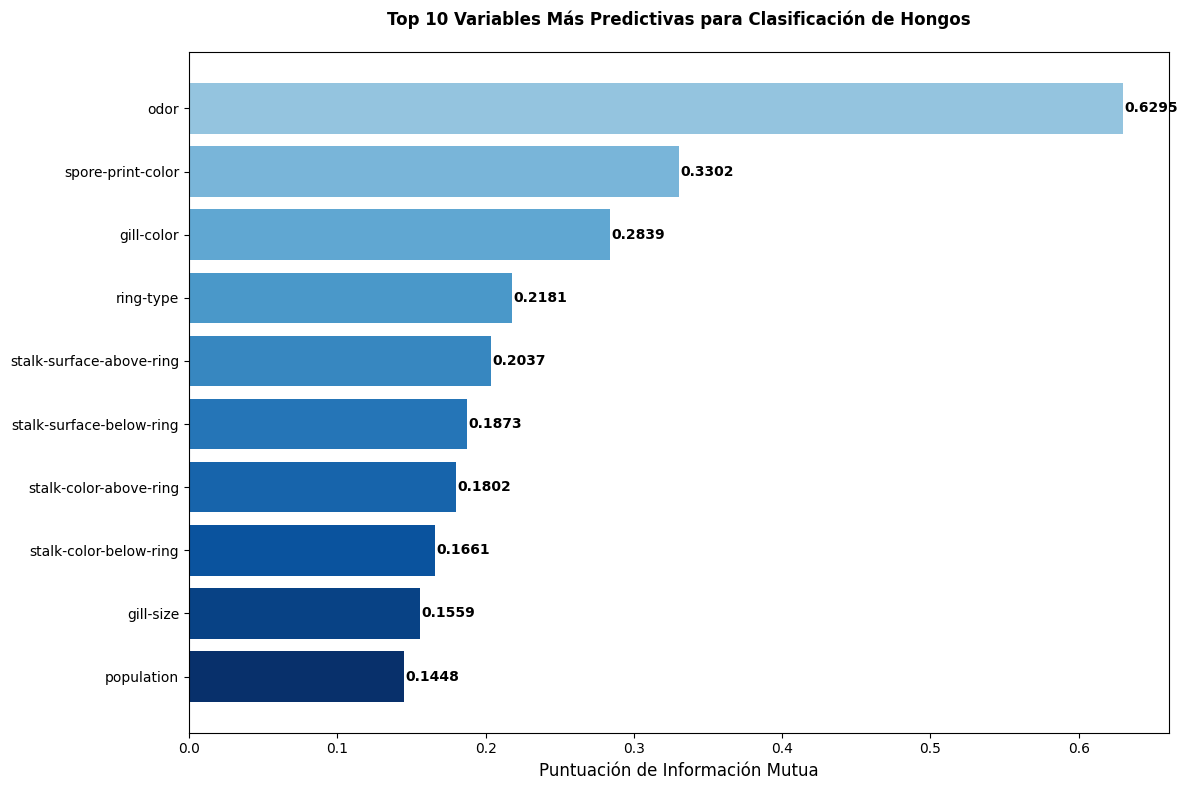


🔍 ANÁLISIS DETALLADO DE LAS 3 VARIABLES MÁS IMPORTANTES:

📋 ODOR:
poisonous      e      p
odor                   
a          100.0    0.0
c            0.0  100.0
f            0.0  100.0
l          100.0    0.0
m            0.0  100.0
n           96.6    3.4
p            0.0  100.0
s            0.0  100.0
y            0.0  100.0
  Categorías más peligrosas:
    • c: 100.0% venenosos
    • y: 100.0% venenosos
    • f: 100.0% venenosos

📋 SPORE-PRINT-COLOR:
poisonous              e      p
spore-print-color              
b                  100.0    0.0
h                    2.9   97.1
k                   88.0   12.0
n                   88.6   11.4
o                  100.0    0.0
r                    0.0  100.0
u                  100.0    0.0
w                   24.1   75.9
y                  100.0    0.0
  Categorías más peligrosas:
    • r: 100.0% venenosos
    • h: 97.1% venenosos
    • w: 75.9% venenosos

📋 GILL-COLOR:
poisonous       e      p
gill-color              
b             0.0 

In [290]:
# =============================================================================
# 9. ANÁLISIS DE VARIABLES MÁS PREDICTIVAS
# =============================================================================

print("🎯 IDENTIFICACIÓN DE VARIABLES MÁS PREDICTIVAS")
print("=" * 50)

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Preparar datos para análisis de importancia
X_encoded = X.copy()

# Codificar variables categóricas
label_encoders = {}
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
        label_encoders[col] = le

# Codificar variable objetivo
y_encoded = LabelEncoder().fit_transform(y['poisonous'])

# Calcular importancia de características usando información mutua
mi_scores = mutual_info_classif(X_encoded, y_encoded, random_state=42)
mi_series = pd.Series(mi_scores, index=X_encoded.columns).sort_values(ascending=False)

print("📊 IMPORTANCIA DE VARIABLES (Información Mutua):")
top_features = mi_series.head(10)
for i, (feature, score) in enumerate(top_features.items(), 1):
    print(f"{i:2d}. {feature:20} : {score:.4f}")

# Visualizar importancia de características
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.4, 1, len(top_features)))  # tonos de azul
bars = plt.barh(range(len(top_features)), top_features.values, color=colors)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Puntuación de Información Mutua', fontsize=12)
plt.title('Top 10 Variables Más Predictivas para Clasificación de Hongos', 
          fontweight='bold', pad=20)
plt.gca().invert_yaxis()

# Añadir valores en las barras
for bar, value in zip(bars, top_features.values):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
            f'{value:.4f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis detallado de las 3 variables más importantes
print("\n🔍 ANÁLISIS DETALLADO DE LAS 3 VARIABLES MÁS IMPORTANTES:")
top_3_features = top_features.head(3).index

for feature in top_3_features:
    print(f"\n📋 {feature.upper()}:")
    contingency = pd.crosstab(df[feature], df['poisonous'], normalize='index') * 100
    print(contingency.round(1))
    
    # Identificar categorías más peligrosas
    if 'p' in contingency.columns:
        dangerous_categories = contingency['p'].sort_values(ascending=False).head(3)
        print(f"  Categorías más peligrosas:")
        for cat, pct in dangerous_categories.items():
            print(f"    • {cat}: {pct:.1f}% venenosos")

In [291]:
# =============================================================================
# 10. DETECCIÓN DE PATRONES Y REGLAS DE CLASIFICACIÓN
# =============================================================================

print("🔎 DETECCIÓN DE PATRONES Y REGLAS DE CLASIFICACIÓN")
print("=" * 60)

# Regla 1: Análisis de combinaciones con olor
print("🍄 REGLAS BASADAS EN LA VARIABLE 'odor':")
foul_smell = df[df['odor'].isin(['f', 'c', 'p', 's', 'y', 'm'])]  # Olores peligrosos
safe_smell = df[df['odor'].isin(['a', 'l', 'n'])]  # Olores seguros

print(f"• Hongos con olores 'peligrosos' (f,c,p,s,y,m): {len(foul_smell):,} muestras")
print(f"  - Venenosos: {(foul_smell['poisonous'] == 'p').sum():,} ({(foul_smell['poisonous'] == 'p').mean()*100:.1f}%)")

print(f"• Hongos con olores 'seguros' (a,l,n): {len(safe_smell):,} muestras")
print(f"  - Venenosos: {(safe_smell['poisonous'] == 'p').sum():,} ({(safe_smell['poisonous'] == 'p').mean()*100:.1f}%)")

# Regla 2: Combinación de características
print("\n🔍 COMBINACIONES ESPECÍFICAS:")

# Combinación 1: Olor a almendra + morenas
almond_bruises = df[(df['odor'] == 'a') & (df['bruises'] == 't')]
print(f"• Olor a almendra + morenas: {len(almond_bruises):,} muestras")
if len(almond_bruises) > 0:
    poisonous_pct = (almond_bruises['poisonous'] == 'p').mean() * 100
    print(f"  - Venenosos: {poisonous_pct:.1f}%")

# Combinación 2: Olor fétido + población agrupada
foul_clustered = df[(df['odor'] == 'f') & (df['population'] == 'c')]
print(f"• Olor fétido + población agrupada: {len(foul_clustered):,} muestras")
if len(foul_clustered) > 0:
    poisonous_pct = (foul_clustered['poisonous'] == 'p').mean() * 100
    print(f"  - Venenosos: {poisonous_pct:.1f}%")

# Análisis de patrones por hábitat
print("\n🌿 DISTRIBUCIÓN POR HÁBITAT:")
habitat_analysis = pd.crosstab(df['habitat'], df['poisonous'], normalize='index') * 100
habitat_counts = df['habitat'].value_counts()

# Diccionario de hábitats
habitat_descriptions = {
    'g': 'pastizales', 'l': 'hojas', 'm': 'prados', 
    'p': 'caminos', 'u': 'urbano', 'w': 'basura', 'd': 'bosques'
}

print("\nRiesgo por hábitat:")
for habitat_code in habitat_analysis.index:
    desc = habitat_descriptions.get(habitat_code, 'desconocido')
    poisonous_pct = habitat_analysis.loc[habitat_code, 'p']
    count = habitat_counts[habitat_code]
    risk_level = "ALTO" if poisonous_pct > 50 else "MODERADO" if poisonous_pct > 25 else "BAJO"
    print(f"• {desc:10} ({habitat_code}): {poisonous_pct:5.1f}% venenosos | {count:4} muestras | Riesgo: {risk_level}")

🔎 DETECCIÓN DE PATRONES Y REGLAS DE CLASIFICACIÓN
🍄 REGLAS BASADAS EN LA VARIABLE 'odor':
• Hongos con olores 'peligrosos' (f,c,p,s,y,m): 3,796 muestras
  - Venenosos: 3,796 (100.0%)
• Hongos con olores 'seguros' (a,l,n): 4,328 muestras
  - Venenosos: 120 (2.8%)

🔍 COMBINACIONES ESPECÍFICAS:
• Olor a almendra + morenas: 400 muestras
  - Venenosos: 0.0%
• Olor fétido + población agrupada: 0 muestras

🌿 DISTRIBUCIÓN POR HÁBITAT:

Riesgo por hábitat:
• bosques    (d):  40.3% venenosos | 3148 muestras | Riesgo: MODERADO
• pastizales (g):  34.5% venenosos | 2148 muestras | Riesgo: MODERADO
• hojas      (l):  71.2% venenosos |  832 muestras | Riesgo: ALTO
• prados     (m):  12.3% venenosos |  292 muestras | Riesgo: BAJO
• caminos    (p):  88.1% venenosos | 1144 muestras | Riesgo: ALTO
• urbano     (u):  73.9% venenosos |  368 muestras | Riesgo: ALTO
• basura     (w):   0.0% venenosos |  192 muestras | Riesgo: BAJO


In [292]:
# =============================================================================
# 11. RESUMEN EJECUTIVO E INSIGHTS
# =============================================================================

print("📊 RESUMEN EJECUTIVO E INSIGHTS PRINCIPALES")
print("=" * 60)

# Métricas generales
total_samples = len(df)
num_features = len(df.columns) - 1
num_classes = df['poisonous'].nunique()
class_balance_ratio = target_distribution.max() / target_distribution.min()

print("📈 MÉTRICAS GENERALES:")
print(f"• Total de muestras: {total_samples:,}")
print(f"• Variables predictoras: {num_features}")
print(f"• Clases objetivo: {num_classes} (Comestible/Venenoso)")
print(f"• Ratio de balance: {class_balance_ratio:.2f}:1")
print(f"• Valores faltantes: {missing_data.sum()} en {len(missing_columns)} variables")
print(f"• Registros duplicados: {duplicates} ({duplicate_percent:.2f}%)")

print("\n🎯 INSIGHTS PRINCIPALES:")

# Insight 1: Variable más predictiva
top_feature = list(top_features.head(1).items())[0]
print(f"1. '{top_feature[0]}' es la variable más predictiva (MI: {top_feature[1]:.4f})")

# Insight 2: Reglas simples de clasificación
print(f"2. El OLOR es un indicador extremadamente confiable:")
print(f"   - Olores 'a' (almendra), 'l' (anís), 'n' (ninguno): {((safe_smell['poisonous'] == 'e').mean()*100):.1f}% seguros")
print(f"   - Otros olores: {((foul_smell['poisonous'] == 'p').mean()*100):.1f}% venenosos")

# Insight 3: Distribución de clases
print(f"3. Distribución balanceada: {target_percentage['e']:.1f}% comestibles vs {target_percentage['p']:.1f}% venenosos")

# Insight 4: Valores faltantes
if len(missing_columns) > 0:
    most_missing = missing_info.iloc[0]
    print(f"4. Variable con más valores faltantes: '{most_missing.name}' ({most_missing['Porcentaje']:.1f}%)")

# Insight 5: Patrones geográficos
most_dangerous_habitat = habitat_analysis['p'].idxmax()
most_dangerous_pct = habitat_analysis['p'].max()
print(f"5. Hábitat más peligroso: '{habitat_descriptions.get(most_dangerous_habitat, most_dangerous_habitat)}' ({most_dangerous_pct:.1f}% venenosos)")

print("\n💡 RECOMENDACIONES PARA MODELADO:")
print("• EMPLEAR árboles de decisión o random forests para capturar reglas complejas")
print("• CONSIDERAR one-hot encoding para variables categóricas")
print("• IMPLEMENTAR stratified sampling para mantener distribución de clases")
print("• PRIORIZAR variables como 'odor', 'spore-print-color', 'gill-color' en feature engineering")
print("• EVALUAR imputación de valores faltantes o eliminación de variables con muchos missing")
print("• CONSIDERER reglas de negocio basadas en olores para filtrado inicial")

print("\n⚠️  ADVERTENCIAS:")
print("• Este es un dataset hipotético - NO usar para identificación real de hongos")
print("• Siempre consultar con expertos para identificación de hongos silvestres")
print("• La seguridad alimentaria requiere verificación profesional")

print("\n" + "=" * 60)
print("🎉 ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 60)

📊 RESUMEN EJECUTIVO E INSIGHTS PRINCIPALES
📈 MÉTRICAS GENERALES:
• Total de muestras: 8,124
• Variables predictoras: 22
• Clases objetivo: 2 (Comestible/Venenoso)
• Ratio de balance: 1.07:1
• Valores faltantes: 2480 en 1 variables
• Registros duplicados: 0 (0.00%)

🎯 INSIGHTS PRINCIPALES:
1. 'odor' es la variable más predictiva (MI: 0.6295)
2. El OLOR es un indicador extremadamente confiable:
   - Olores 'a' (almendra), 'l' (anís), 'n' (ninguno): 97.2% seguros
   - Otros olores: 100.0% venenosos
3. Distribución balanceada: 51.8% comestibles vs 48.2% venenosos
4. Variable con más valores faltantes: 'stalk-root' (30.5%)
5. Hábitat más peligroso: 'caminos' (88.1% venenosos)

💡 RECOMENDACIONES PARA MODELADO:
• EMPLEAR árboles de decisión o random forests para capturar reglas complejas
• CONSIDERAR one-hot encoding para variables categóricas
• IMPLEMENTAR stratified sampling para mantener distribución de clases
• PRIORIZAR variables como 'odor', 'spore-print-color', 'gill-color' en feature 